In [1]:
# Prepared by Federica Bianco - http://www.github.com/fedhere
# Modified by Graham Henke

In [2]:
# Import statements
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import os
import json
s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


/Users/JianhaoZhou/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
# Read in Citibike dataset from January 2015
# Available at https://www.citibikenyc.com/system-data
df=pd.read_csv(os.getenv('PUI2015')+'/notebooks/data/201501-citibike-tripdata.csv')

In [6]:
# df is the dataframe where the content of the csv file is stored
df['ageL'] = 2015-df['birth year'][(df['usertype']=='Subscriber') & (df['tripduration']>=3000)]
df['ageS'] = 2015-df['birth year'][(df['usertype']=='Subscriber') & (df['tripduration']<3000)]
# note that with dataframes i can refer to variables as dictionary keys, i.e. df['starttime'] or as attributes: df.starttime. 

df.head()
pd.unique(df.usertype)

array(['Subscriber', 'Customer'], dtype=object)

[ 0 10 20 30 40 50 60 70 80 90]
          count_nonzero
ageS                   
(0, 10]             NaN
(10, 20]           2466
(20, 30]          67877
(30, 40]         155363
(40, 50]         221515
(50, 60]         264645
(60, 70]         277123
(70, 80]         278667
(80, 90]         278725
          count_nonzero
ageL                   
(0, 10]             NaN
(10, 20]              8
(20, 30]            227
(30, 40]            531
(40, 50]            798
(50, 60]            984
(60, 70]           1054
(70, 80]           1061
(80, 90]            NaN
KS 0.0569347918508


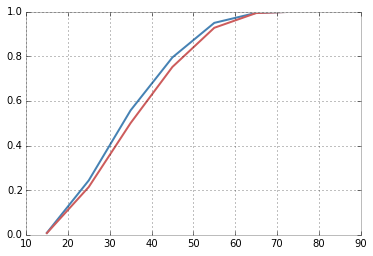

In [7]:
# Create age bins
bins = np.arange(0, 99, 10)
print bins

# Aggregates of ages
ag1 = df.ageS.groupby(pd.cut(df.ageS, bins)).agg([count_nonzero])
ag2 = df.ageL.groupby(pd.cut(df.ageL, bins)).agg([count_nonzero])
#ag1.plot(kind="bar")
#ag2.plot(kind="bar")

# Aggregate the cumulative sum of each age group
cs1=df.ageS.groupby(pd.cut(df.ageS, bins)).agg([count_nonzero]).cumsum()
cs2=df.ageL.groupby(pd.cut(df.ageL, bins)).agg([count_nonzero]).cumsum()
print cs1
print cs2
#cs1.plot()
#cs2.plot()

#print df.ageS
#print pd.cut(df['ageS'], bins)
#print df.ageS.groupby(pd.cut(df.ageS, bins))
#print df.ageS.groupby(pd.cut(df.ageS, bins)).agg([count_nonzero])
#print df.ageS.groupby(pd.cut(df.ageS, bins)).agg([count_nonzero]).cumsum()

# Plot and find KS
pl.plot(bins[:-1]+5,cs1/cs1.max())
pl.plot(bins[:-1]+5,cs2/cs2.max())
KS = np.nanmax(np.array(cs1/cs1.max())-np.array(cs2/cs2.max()))
print "KS", KS

In [6]:
values=[np.zeros(len(bins)-1),np.zeros(len(bins)-1)]
values[0]=np.array(cs1/cs1.max())
values[1]=np.array(cs2/cs2.max())
#values=np.array([[1,2,3],[1,2,3]])

values=np.array(values).squeeze(axis=2)
values[np.isnan(values)]=0

In [7]:
#%%timeit -n 100
E = np.empty_like(values)

for j in range(len(values[0])):
    for i in range(2):
        E[i][j] = sum(values[i,:])*sum(values[:,j])/sum(values)
#%whos


In [8]:
print E 
print len(values[0])
print "chisq" , nansum((values-E)**2/E)
print values-E

[[ 0.          0.00914402  0.25526599  0.59028269  0.86313164  1.04729367
   1.10908727  1.1158596   0.55798786]
 [ 0.          0.00724347  0.20220989  0.46759461  0.68373292  0.82961755
   0.87856758  0.88393231  0.44201214]]
9
chisq 0.884677645158
[[  0.00000000e+00  -2.96588404e-04  -1.17392118e-02  -3.28766428e-02
   -6.83877217e-02  -9.78094097e-02  -1.14834873e-01  -1.16067695e-01
    4.42012142e-01]
 [  0.00000000e+00   2.96588404e-04   1.17392118e-02   3.28766428e-02
    6.83877217e-02   9.78094097e-02   1.14834873e-01   1.16067695e-01
   -4.42012142e-01]]


In [9]:
#%%timeit -n 100 


E = np.outer(sum(values,axis=1),sum(values,axis=0))
E=(E/sum(values))#.squeeze(axis=2)
#%whos
print E.shape, values.shape

(2, 9) (2, 9)


In [10]:


print E
print len(values[0])
print "chisq" , nansum((values-E)**2/E)
print values-E

[[ 0.          0.00914402  0.25526599  0.59028269  0.86313164  1.04729367
   1.10908727  1.1158596   0.55798786]
 [ 0.          0.00724347  0.20220989  0.46759461  0.68373292  0.82961755
   0.87856758  0.88393231  0.44201214]]
9
chisq 0.884677645158
[[  0.00000000e+00  -2.96588404e-04  -1.17392118e-02  -3.28766428e-02
   -6.83877217e-02  -9.78094097e-02  -1.14834873e-01  -1.16067695e-01
    4.42012142e-01]
 [  0.00000000e+00   2.96588404e-04   1.17392118e-02   3.28766428e-02
    6.83877217e-02   9.78094097e-02   1.14834873e-01   1.16067695e-01
   -4.42012142e-01]]


In [11]:
c1 = (cs1-cs1.mean())/cs1.std()
c2 = (cs2-cs2.mean())/cs2.std()
print nansum(c1*c2)/(len(bins)-2)

pho=1-(6*nansum((c1-c2)**2))/((len(bins)-2)*((len(bins)-2)**2-1))
print pho
print pho*np.sqrt(((len(bins)-2)-2)/(1-pho**2))

0.766068673635
0.998656110321
47.1998633862


40.0428597555 11.5737949068
0.0344694444315 0.0323810463668 0.0344051730666
0.930715548076


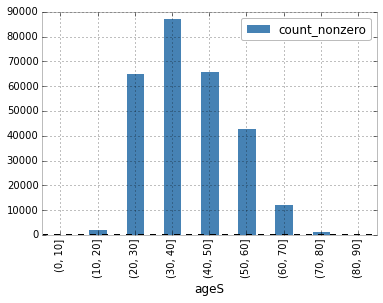

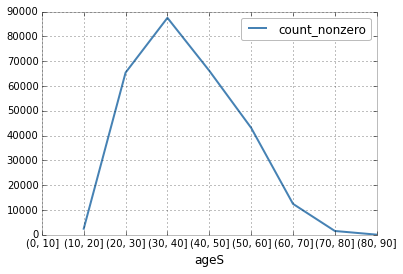

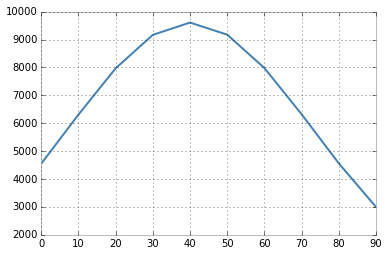

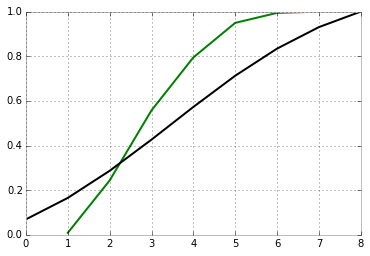

In [12]:
#print df.ageS, df.ageS.cumsum()
bins = np.arange(0, 99, 10)
cs1=df.ageS.groupby(pd.cut(df.ageS, bins)).agg([count_nonzero])

cs1.plot(kind='bar')
m=np.nanmean(df.ageS)
s=np.std(df.ageS)
print m, s
def model( x) : 
    return 1./(s*np.sqrt(2*np.pi))*exp(-((x-m)/2./2./s)**2)

print model(m), model(m-s), model(m+2)


cs1.plot()
pl.figure()
pl.plot(bins,np.vectorize(model)(bins)*np.nansum(cs1))
pl.figure()
pl.plot(cs1.cumsum()/cs1.cumsum().max(),'g')
pl.plot(model(bins[:-1]).cumsum()/model(bins[:-1]).cumsum().max(),'k')

KS=np.nanmax(np.array(cs1.cumsum()/cs1.cumsum().max())-np.array(model(bins[:-1]).cumsum()/model(bins[:-1]).cumsum().max()))
print KS

In [13]:
import scipy.stats

In [14]:
print cs1.count_nonzero
A, crit, sig = scipy.stats.anderson(df.ageS[~np.isnan(df.ageS)], dist='norm')
print A, crit, sig
A, crit, sig = scipy.stats.anderson(np.random.randn(1000), dist='norm')
print A, crit, sig
A, crit, sig = scipy.stats.anderson(np.random.chisquare(1000,10000), dist='norm')
print A, crit, sig

ageS
(0, 10]       NaN
(10, 20]     2466
(20, 30]    65411
(30, 40]    87486
(40, 50]    66152
(50, 60]    43130
(60, 70]    12478
(70, 80]     1544
(80, 90]       58
Name: count_nonzero, dtype: float64
2724.31470415 [ 0.576  0.656  0.787  0.918  1.092] [ 15.   10.    5.    2.5   1. ]
0.464768384428 [ 0.574  0.653  0.784  0.914  1.088] [ 15.   10.    5.    2.5   1. ]
0.525217543083 [ 0.576  0.656  0.787  0.918  1.092] [ 15.   10.    5.    2.5   1. ]


In [15]:
ks=scipy.stats.kstest(df.ageS[~np.isnan(df.ageS)],'norm')
print ks
print ""
ks = scipy.stats.kstest(np.random.randn(1000), 'norm')
print ks
print ""
ks = scipy.stats.kstest(np.random.chisquare(1000,10000), 'norm')
print ks
print ""


(1.0, 0.0)

(0.046649079779351621, 0.024937512188698996)

(1.0, 0.0)

